In [1]:
import pandas as pd
train_df = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
test_df = pd.read_csv("house-prices-advanced-regression-techniques/test.csv")

In [2]:
train = train_df.loc[:,"MSSubClass":"SaleCondition"]
test = test_df.loc[:,"MSSubClass":"SaleCondition"]
x = pd.concat([train, test])
y_train = train_df["SalePrice"]

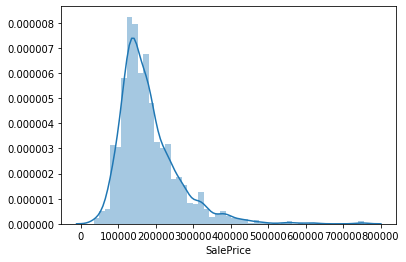

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.distplot(y_train)

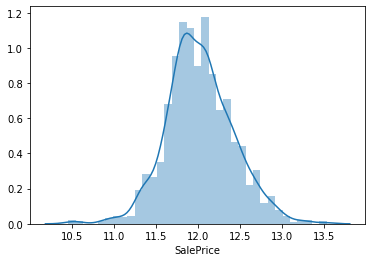

In [4]:
import numpy as np
y_train = np.log1p(y_train)
sns.distplot(y_train)

In [5]:
# 先把數字類型的欄位存起來!
numeric = (x.columns[x.dtypes != "object"]
            .drop(["MSSubClass"]))
numeric

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [6]:
x = pd.get_dummies(x) 
# This function will drop the original variables.
# If the original value is NA, the values of dummies are 0. 
x = pd.get_dummies(x, columns=["MSSubClass"])
x

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,0,0,0,0,0,0,0
1,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,0,0,0,0,0,0,0
2,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,0,0,0,0,0,0,0
3,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,1,0,0,0,0,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,...,0,0,0,0,0,0,0,1,0,0
1455,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,...,0,0,0,0,0,0,0,1,0,0
1456,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1457,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,0,0,0,1,0,0,0,0,0,0


In [7]:
x.isna().sum()[x.isna().sum() > 0]

LotFrontage     486
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt     159
GarageCars        1
GarageArea        1
dtype: int64

In [8]:
from scipy.stats import skew

# The result is a series
sk = x[numeric].apply(lambda s: skew(s.dropna()), axis = 0)
sk[sk > 3].sort_values(ascending = False)

MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.145323
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.929996
dtype: float64

In [9]:
from scipy.special import boxcox1p

need_saved = sk[sk > 5]
x_skew = boxcox1p(x[need_saved.index], 0.15)

sk = x_skew.apply(lambda s: skew(s.dropna()), axis = 0)
sk.sort_values(ascending = False)

PoolArea        15.119426
3SsnPorch        8.924822
LowQualFinSF     8.744143
MiscVal          5.597060
LotArea          0.210453
dtype: float64

In [10]:
x[need_saved.index] = x_skew
x = x.drop(["PoolArea"], axis = 1)

In [11]:
numeric = numeric.drop(['PoolArea'])

# normal distribution -> mean
x[numeric] = x[numeric].fillna(x[numeric].mean())
s = x.isna().sum()
s[s > 0]

Series([], dtype: int64)

In [23]:
x_train = x.iloc[:train_df.shape[0]]
x_test = x.iloc[train_df.shape[0]:]

In [26]:
# 先做標準化應該會比較好
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.0004)
lasso.fit(x_train, y_train)

C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.180665984230291, tolerance: 0.02327976343365451
  positive)


Lasso(alpha=0.0004, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [27]:
pre = lasso.predict(x_test)
pre = np.expm1(pre)
pre

array([120891.34946808, 149858.59152407, 179073.86672819, ...,
       167459.37078145, 117542.02232598, 224257.92888196])

In [ ]:
upload = pd.DataFrame({
    "Id": test_df["Id"],
    "SalePrice": pre
})

upload.to_csv("full_features_lasso_new.csv", index = False)

In [36]:
pd.set_option('display.max_rows', None)

result = pd.Series(lasso.coef_, index = x_train.columns)
result [result > 0]

LotArea                 0.017649
OverallQual             0.053214
OverallCond             0.039970
YearBuilt               0.001794
YearRemodAdd            0.000835
MasVnrArea              0.000013
BsmtFinSF1              0.000066
BsmtFinSF2              0.000093
BsmtUnfSF               0.000034
TotalBsmtSF             0.000026
GrLivArea               0.000303
BsmtFullBath            0.028029
FullBath                0.023655
HalfBath                0.020487
TotRmsAbvGrd            0.008486
Fireplaces              0.019500
GarageCars              0.036394
GarageArea              0.000075
WoodDeckSF              0.000111
OpenPorchSF             0.000055
EnclosedPorch           0.000144
3SsnPorch               0.004142
ScreenPorch             0.000266
MSZoning_FV             0.013256
Alley_Pave              0.018217
LotConfig_Corner        0.007620
LotConfig_CulDSac       0.029721
LandSlope_Mod           0.012815
Neighborhood_BrkSide    0.039753
Neighborhood_ClearCr    0.012265
Neighborho